Наиболее распространенными задачами машинного обучения являются классификация и регрессия. Для каждого домена данных существует множество специфичных задач, которые с разной степенью успешности решаются специалистами в сфере машинного обучения.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Синтетические/геометрические данные

- Мы точно знаем все зависимости между целевой переменной и признаками, поскольку задаем их сами
- Хорошо подходят для визуализации работы алгоритмов

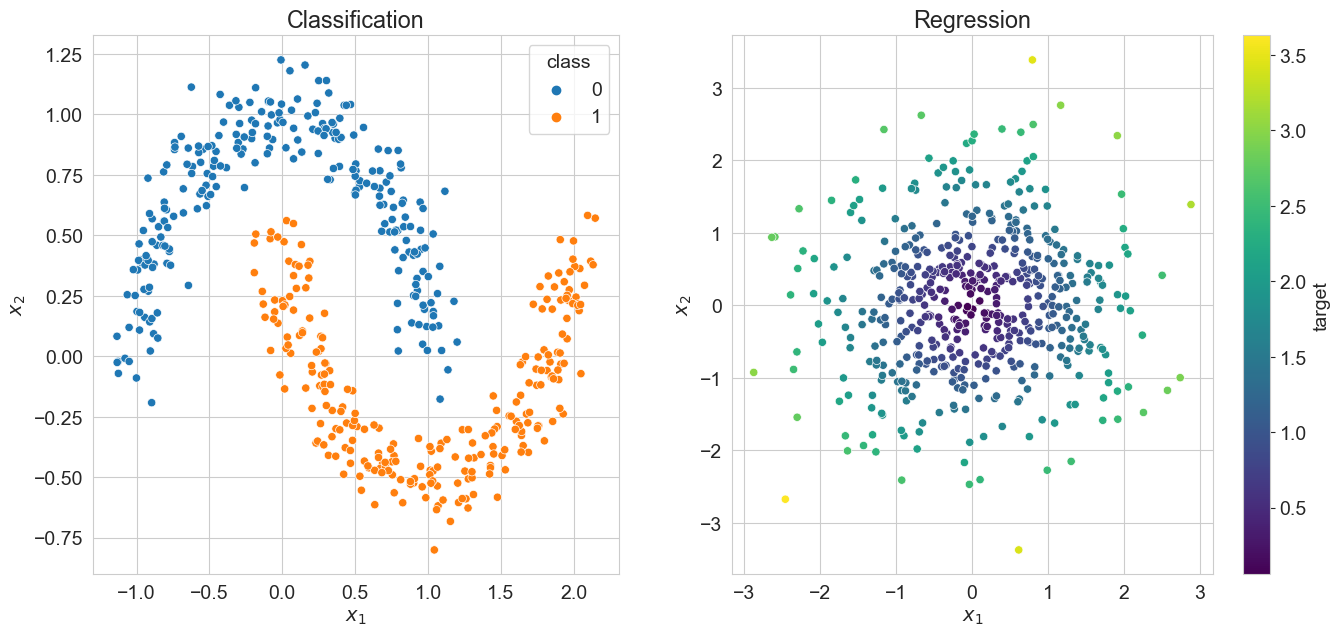

In [51]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, label='target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

## Табличные данные

Конечно, мы могли бы взять любые данные и представить их в качестве таблицы, но здесь речь идет о канонически табличных данных, когда все признаки имеют разную природу и в каком-то смысле являются отдельными, "осмысленными" измерениями. 
- Это один из самых распространненых типов данных, и в нашем курсе мы будем работать с таблицами
- Обычно признаки делятся на вещественные и категориальные.

In [6]:
#Мы возьмем набор данных Housing, который содержит информацию о различных домах в Бостоне.
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']
X = pd.read_csv("https://raw.githubusercontent.com/yakushinav/omo/main/data/housing.csv", header=None, delimiter=r"\s+", names=column_names)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Изображения

Направление машинного обучения, которое имеет дело с изображениями, называется компьютерным зрением (Computer Vision, CV). Как правило, изображения представляют в виде тензоров размерности $(H, W, C)$, где обычно $C = 3$. Содержание тензора зависит от цветового пространства, чаще всего используется RGB. 

In [11]:
!pip install mnist

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import mnist

train_images = mnist.train_images()

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

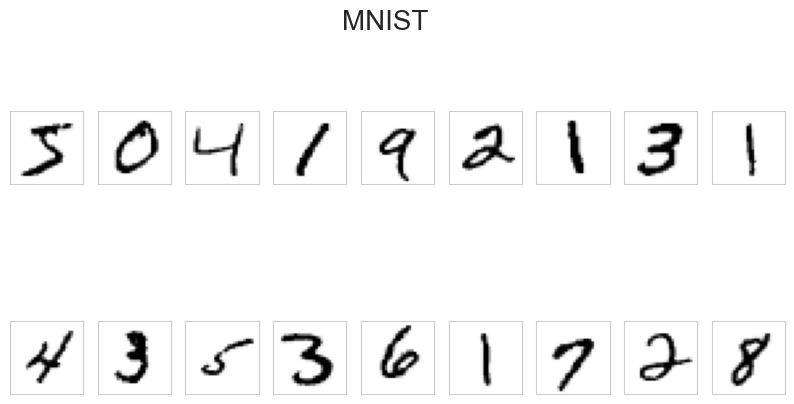

In [13]:
fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

### Задачи:

**Классификация (classification)** (ImageNet, CIFAR-10/100, MNIST)


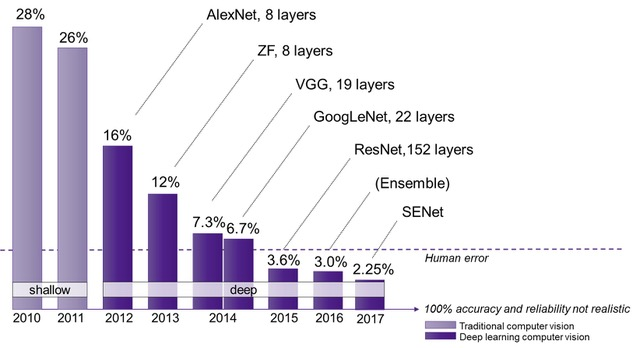

**Семантическая сегментация (semantic segmentation)** (PASCAL VOC, Cityscapes)


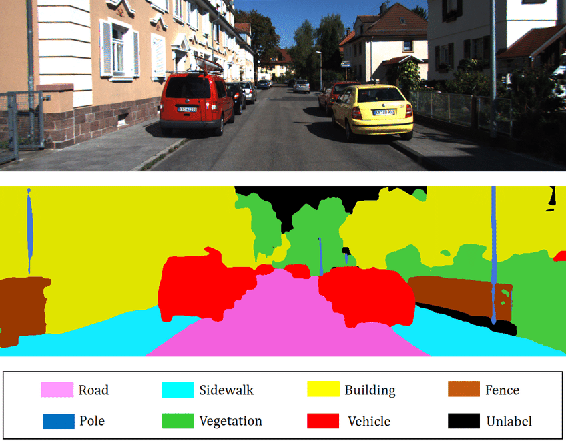

**Детекция объектов (object detection)** (COCO, PASCAL VOC)


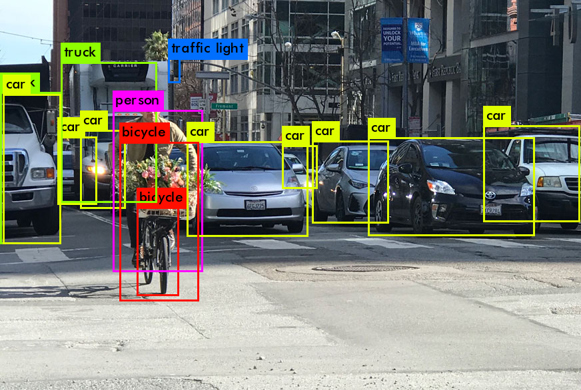

## Текстовые данные

Обработка естественного языка (Natural Language Processing, NLP) - одно из наиболее востребованных направлений в машинном обучении. Зачастую методы из NLP перекочевывают в другие домены данных и находят там успешное применение. Основными особенностями текстовых данных являются, во-первых, их дискретность, а во-вторых, последовательная структура. Как правило, при работе с текстом его токенизируют (по символам, по словам или по сочетаниям символов -- так называемый byte-pair-encoding, BPE), а затем каждому токену присваивается некоторый вектор-эмбеддинг. Такое преобразование позволяет обрабатывать дискретные данные непрерывными моделями.

В последнее время также развиваются инструменты работы с данными, которые похожи на тексты, но таковыми не являются. Например, появляются новые задачи и данные, связанные с обработкой программного кода. 

## Задачи:

- **Машинный перевод (machine translation)** (WMT, IWSLT)
- **Обобщение текста (text summarization)** (GigaWord, arXiv)
- **Моделирование языка (language modelling)** (WikiText)
- **Генерация текста (text generation)** (MATH, COCO Captions)
- **Ответы на вопросы (question answering)** (SQuAD, WikiQA)
- **Определение части речи (part-of-speech tagging, POS)** (Penn Treebank)
- **Анализ эмоциональной окраски (sentiment analysis)** (SST, IMDb)


In [16]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
#Категории текстов
categories = ["comp.graphics", "sci.space", "rec.sport.baseball"]
#Данные
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)


In [20]:
print('text',newsgroups_train.data[0])
print('category:',newsgroups_train.target[0])

text From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana)
Subject: Re: More gray levels out of the screen
Organization: Tampere University of Technology
Lines: 21
Distribution: inet
NNTP-Posting-Host: cc.tut.fi

In article <1993Apr6.011605.909@cis.uab.edu> sloan@cis.uab.edu
(Kenneth Sloan) writes:
>
>Why didn't you create 8 grey-level images, and display them for
>1,2,4,8,16,32,64,128... time slices?

By '8 grey level images' you mean 8 items of 1bit images?
It does work(!), but it doesn't work if you have more than 1bit
in your screen and if the screen intensity is non-linear.

With 2 bit per pixel; there could be 1*c_1 + 4*c_2 timing,
this gives 16 levels, but they are linear if screen intensity is
linear.
With 1*c_1 + 2*c_2 it works, but we have to find the best
compinations -- there's 10 levels, but 16 choises; best 10 must be
chosen. Different compinations for the same level, varies a bit, but
the levels keeps their order.

Readers should verify what I wrote... :-)

Juhana Kouhia

cate

## Аудио

Аудиозаписи часто представляют как последовательность вещественных чисел из промежутка $[-1, 1]\,$ (wav-формат). Такие аудио могут быть как одноканальными, так и многоканальными. При работе с музыкой популярен MIDI-формат. Но наиболее часто встречаются спектрограммы -- результат применения к звуковой волне преобразования Фурье или его вариаций.

In [52]:
#!pip install mnist

In [53]:
import librosa
import soundfile as sf
from six.moves.urllib.request import urlopen
import io

In [42]:
file = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/sound.wav'
signal, sr = sf.read(io.BytesIO(urlopen(file).read()))

In [44]:
print(data.shape, sr)

(1632384, 2) 44100


In [45]:
print(signal)

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -3.05175781e-05]
 [ 3.05175781e-05  6.10351562e-05]
 [-6.10351562e-05 -6.10351562e-05]]


### Задачи

- **Распознавание речи (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Синтез речи (text-to-speech, tts)**
- **Генерация музыки (music generation)**
- **Устранение шумов, улучшение речи (denoising, speech enhancement)**
- **Распознавание ключевых слов (keyword spotting, kws)**

## Видео

Работа с видео-файлами похожа на работу с изображениями: к 2 пространственным размерностям и размерности цветовых каналов добавляется время. Иногда в контексте видео рассматривают и звуковую дорожку. В целом, для видео актуальны все те же задачи, что и для изображений, с поправкой на наличие изменений сцены во времени. Среди специфичных задач можно упомянуть **optical flow** (отслеживание движения пикселей на кадрах) и **object tracking** (отслеживание движущихся объектов).



In [49]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/yakushinav/omo/main/data/dense.gif')